In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

Text(0, 0.5, 'Concentration')

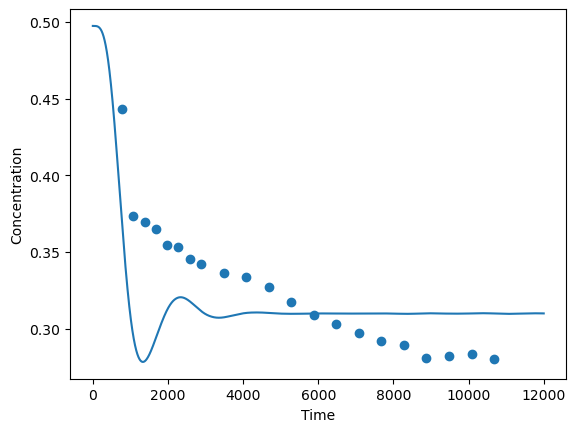

In [3]:
def generateODE6(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.4975                     # gm/(100 gm of mixed solvent)
    Ce = 0.19                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    A1= 0.001
    g1= 1.46744
    A2= 0.001
    g2= 0.98064
    kb= 0.3159
    b= 0.1172
    
    f = 4.167 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span6 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points6 = 12000
initialConditions6 = [0, 0, 0, 0, 0.4975]
sol6 = solve_ivp(
    lambda t, m: generateODE6(t, m),
    t_span6,
    initialConditions6,
    t_eval=np.linspace(t_span6[0], t_span6[1], num_points6)
)
Time6 = [780,1080,1380,1680,1980,2280,2580,2880,3480,4080,4680,5280,5880,6480,7080,7680,8280,8880,9480,10080,10680]
Concentration6 = [0.4431521957, 0.3734801995,0.3694454804,0.3652467129,0.3545191401,0.3534851964,0.3452264331,0.3420822219,0.3365299156,0.3338307074,0.3269978248,0.3173988634,0.3086842294,0.3029290175,0.2972836748,0.2915360698,0.2890670503,0.2808843891,0.2820585065,0.2832595483,0.280328261]
plt.scatter(Time6, Concentration6)
plt.plot(sol6.t,sol6.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")